## Name: SHILPI PARIKH

## Email ID: shilpiparikh20@gmail.com


#                 Task 3 - To Explore Unsupervised Machine Learning

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

#### First of all import all the required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [6]:
df = pd.read_csv("Iris.csv")
print("Data has been imported successfully into the df Dataframe")

Data has been imported successfully into the df Dataframe


#### Knowning the Iris dataset

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [18]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
df.shape

(150, 6)

In [20]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


#### Exploratory Data Analysis 

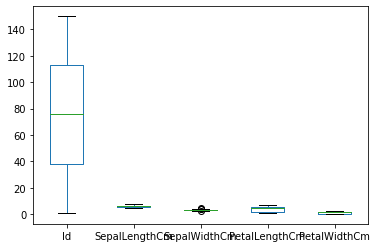

In [24]:
df.plot(kind='box')
plt.show()

In [26]:
#individual species count of flowers

print(df['Species'].unique())

print('\n''Quantity of the Species :-''\n',df['Species'].value_counts())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Quantity of the Species :-
 Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


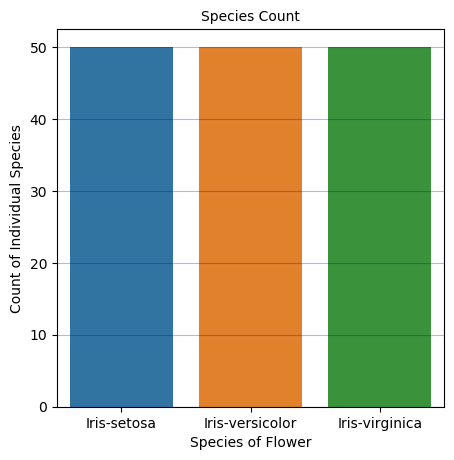

In [31]:
plt.figure(figsize = (5,5), dpi = 100)
plt.grid(color = 'blue', alpha = 0.3)

sns.countplot('Species',data = df)
plt.yticks(fontsize=10,color = 'black')
plt.xticks(fontsize=10,color = 'black')
plt.title('Species Count',color='black',size = 10)
plt.xlabel('Species of Flower',color='black',size = 10)
plt.ylabel('Count of Individual Species',color='black',size = 10)

plt.show()


## Data Visualization

### Plotting Pair Plot

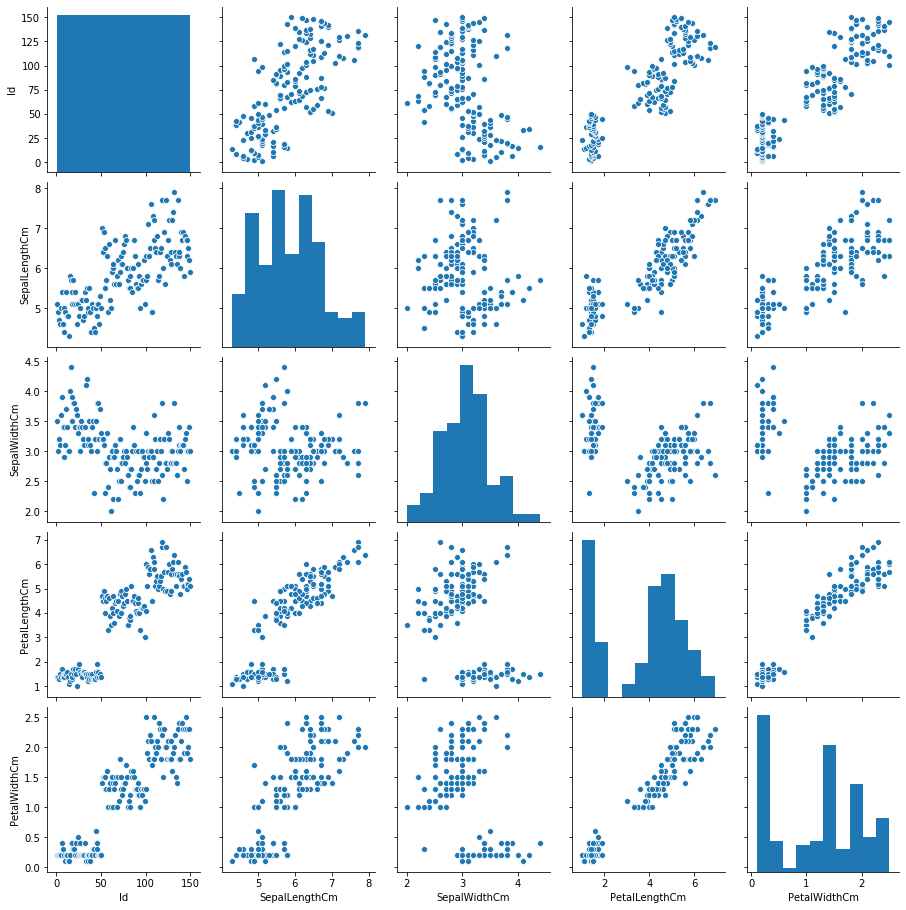

In [34]:
sns.pairplot(df)

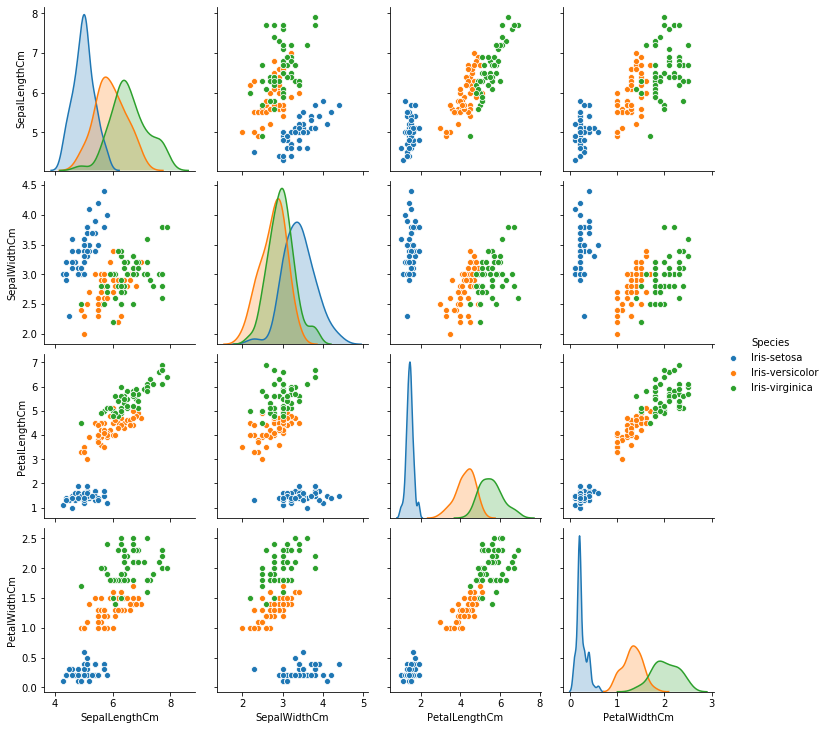

In [35]:
sns.pairplot(df.iloc[:,[1,2,3,4,5]],hue='Species')

#### From the above Pair plot, we can observe that there are already three types of cluster formed.

### Plotting Heat Map

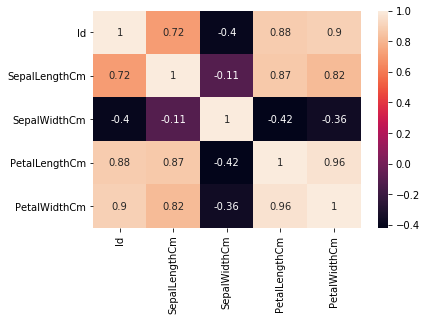

In [39]:
sns.heatmap(df.corr(),annot=True)

#### To determine the optimum number of clusters for K-Means clustering, first of all we need to find the value of K. We can find the value of K by using 'Elbow Method' 

In [40]:
### Implementing Elbow Method 

In [61]:
x = df.iloc[:,[1,2,3,4]].values #Splitting of dataset

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    


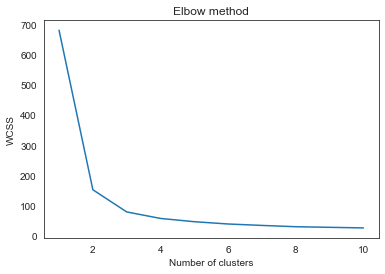

In [62]:
# Plotting the results onto a line graph to observe 'The Elbow Method'

plt.plot(range(1, 11), var)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Here WCSS stands for 'Within cluster sum of squares'

#### There is a point in the graph from where WCSS does not decrease significantly. This point is the optimum number of clusters for dataset. So here the optimum number of cluster is 3 i.e. k=3

### Training the K-Means Model

In [65]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                 n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [66]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Clusters Visualization in the first 2 columns

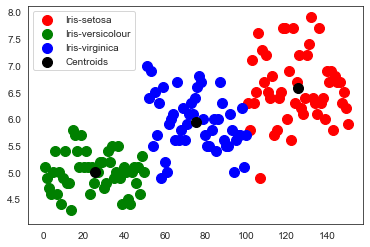

In [67]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

### Visualizig the Sepal Lenght and Width

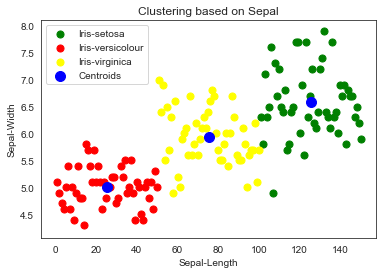

In [73]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'green', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clustering based on Sepal')
plt.xlabel('Sepal-Length')
plt.ylabel('Sepal-Width')
plt.legend()
plt.show()

### Visualizing the Petal's Length and Width  

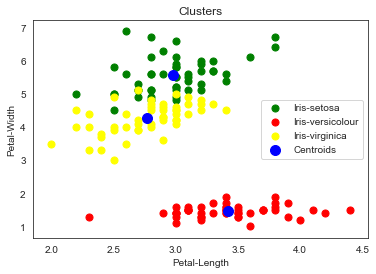

In [72]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 50, c = 'green', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 50, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Petal-Length')
plt.ylabel('Petal-Width')
plt.legend()
plt.show()

####          



                                                   *Completion of Task-3*